In [5]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [2]:
filt = {
    "cty":"", # 上海/北京/杭州/深圳/成都/广州/天津/南京/苏州/重庆 等
    "ctl":"" # 展览休闲/音乐会/话剧歌剧/演唱会/曲苑杂坛/体育/舞蹈芭蕾/儿童亲子
}

In [3]:
def get_show(filt):
    
    res = requests.post('https://search.damai.cn/searchajax.html',data=filt) # requests.post 可以加data参数（requests.get没有这个参数）
    # https://search.damai.cn/search.html 的源代码里找不到search结果，网页右键-检查-Network-刷新页面-searchajax.html?...文件
    # -里面找到搜索结果文本，所以request这个页面
    total_page = json.loads(res.text)['pageData']['totalPage']
    title_list = []
    price_list = []
    showtime_list = []
    page_list = []
    cat_list = []
    city_list = []
    stat_list = []
    ven_list = []
    pricehi_list = []
    for page in range(1,total_page+1):
        filt["currPage"] = page
        res2 = requests.post('https://search.damai.cn/searchajax.html',data=filt)
        show_list = json.loads(res2.text)['pageData']['resultData'] # 用jason.loads将文本转化为ordered dictionary
        for show in show_list:
            title_list.append(show['name'])
            price_list.append(show['price'])
            showtime_list.append(show['showtime'])
            page_list.append(page)
            cat_list.append(show['categoryname'])
            city_list.append(show['cityname'])
            stat_list.append(show['showstatus'])
            ven_list.append(show['venue'])
            pricehi_list.append(show['pricehigh'])
    df = pd.DataFrame({'title':title_list,'category':cat_list,'city':city_list,'venue':ven_list,
                       'pricelow':price_list,'pricehigh':pricehi_list,'showtime':showtime_list,
                       'status':stat_list,'page':page_list})
    return df

In [6]:
df = get_show(filt)

In [7]:
df

,title,category,city,venue,pricelow,pricehigh,showtime,status,page
0,“天空之城”久石让&宫崎骏经典动漫作品演奏会,音乐会,成都,成都艺术中心音乐厅(原特仑苏音乐厅),0.0,10000000.0,2020.07.19 周日,未开售,1
1,Fantasy on Ice 2020 in SHANGHAI 冰上幻想上海站,体育,上海,,0.0,10000000.0,时间待定,未开售,1
2,西班牙|互动多媒体舞蹈旅行剧《开小差》,儿童亲子,北京,天桥艺术中心-多功能厅,0.0,10000000.0,2020.05.28~2020.06.07,未开售,1
3,“卡农Canon In D”永恒经典名曲精选音乐会,音乐会,成都,成都艺术中心音乐厅(原特仑苏音乐厅),0.0,10000000.0,2020.06.26 周五,未开售,1
4,戏胞有艺思超级飞侠《多多帮帮忙》豪华亲子舞台剧,儿童亲子,呼和浩特,,0.0,10000000.0,时间待定,未开售,1
...,...,...,...,...,...,...,...,...,...
1140,《联华梨园社·春熙剧场》—川戏清口特色川剧变脸秀,曲苑杂坛,成都,联华梨园社(春熙剧场),78.0,128.0,2020.05.20-05.30,售票中,20
1141,东野圭吾“加贺系列”首部悬疑舞台剧 《新参者》,话剧歌剧,上海,人民大舞台,80.0,588.0,2020.07.16-07.19,售票中,20
1142,文旅驻场杂技秀《魔幻之都-极限快乐SHOW》,曲苑杂坛,重庆,重庆国际马戏城,100.0,280.0,2020.05.22-05.31,售票中,20
1143,重庆洪崖洞,展览休闲,重庆,洪崖洞民俗风貌区,15.0,15.0,2020.05.20-05.31,售票中,20


In [8]:
df.status.value_counts()

售票中    1119
退票中      18
未开售       6
预售        2
Name: status, dtype: int64

In [9]:
df.city.value_counts()

上海     226
北京     101
杭州      88
深圳      87
成都      75
      ... 
连云港      1
张家口      1
洛阳       1
蚌埠       1
中山       1
Name: city, Length: 61, dtype: int64

In [10]:
df.category.value_counts()

展览休闲    308
儿童亲子    184
音乐会     181
话剧歌剧    174
演唱会     135
曲苑杂坛     69
体育       62
舞蹈芭蕾     32
Name: category, dtype: int64

In [11]:
df[['pricelow','pricehigh']].describe()

,pricelow,pricehigh
count,1145.000000,1.145000e+03
mean,268.804017,1.319616e+05
std,1271.575145,1.137472e+06
min,0.000000,0.000000e+00
25%,50.000000,1.200000e+02
50%,80.000000,2.990000e+02
75%,180.000000,6.800000e+02
max,30000.000000,1.000000e+07


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

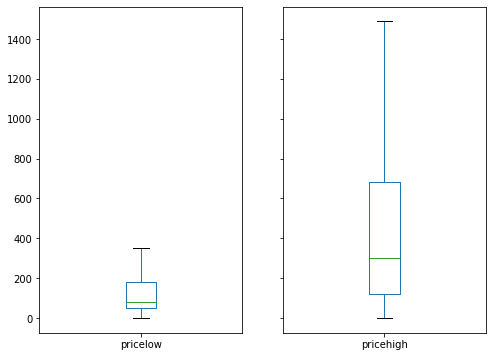

In [22]:
f,ax = plt.subplots(1,2,figsize=(8,6),sharey=True)
df.pricelow.plot.box(showfliers=False,ax=ax[0])
df.pricehigh.plot.box(showfliers=False,ax=ax[1])

In [23]:
df1 = df[df.pricehigh<300001] #去掉极值

In [24]:
citylist = list(df1.city.value_counts().head(10).index)

citylist

['上海', '北京', '杭州', '深圳', '成都', '天津', '广州', '武汉', '苏州', '重庆']

Text(0.5, 1.0, '各城市最低票价分布情况')

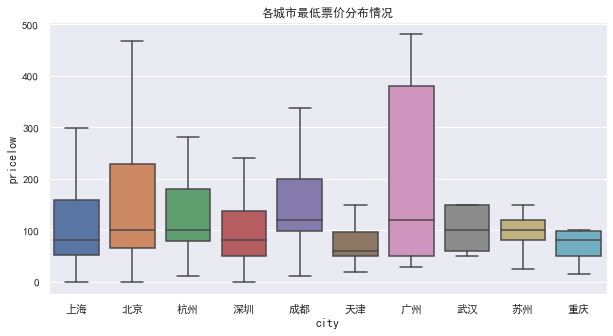

In [28]:
plt.figure(figsize=(10,5))
sns.set(font='SimHei')
sns.boxplot(x='city',y='pricelow',data=df1,order=citylist,showfliers=False)
plt.title('各城市最低票价分布情况')

Text(0.5, 1.0, '各城市最高票价分布情况')

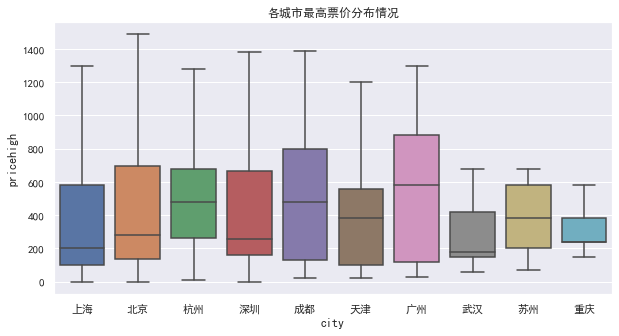

In [26]:
plt.figure(figsize=(10,5))
#sns.set(font='SimHei')
sns.boxplot(x='city',y='pricehigh',data=df1,order=citylist,showfliers=False)
plt.title('各城市最高票价分布情况')